In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

### Step 1 : Data Loading 

In [27]:
house = pd.read_excel(r"C:\Users\Admin\OneDrive\Documents\Machine Learning\Linear Regression\Houses.xlsx")
house

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,price
0,3974,3,1,11,2.8,3,4.6,514.15
1,1660,3,1,16,14.4,6,3.5,125.82
2,2094,1,3,28,9.5,1,2.3,213.67
3,1930,5,2,5,4.2,7,4.3,327.44
4,1895,1,1,6,10.4,1,2.5,188.46
...,...,...,...,...,...,...,...,...
195,2106,2,2,18,6.0,3,3.5,283.23
196,3480,3,3,16,13.3,3,1.9,412.81
197,3475,4,1,20,6.5,4,3.1,397.51
198,1772,5,2,13,12.4,2,3.4,200.87


In [28]:
house.ndim

2

In [29]:
house.shape

(200, 8)

In [30]:
house.describe()

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2509.580000,2.790000,1.905000,14.710000,7.409500,4.885000,3.051500,327.164200
std,898.436875,1.384008,0.830314,8.780741,3.896521,2.581686,1.166491,113.913716
min,821.000000,1.000000,1.000000,0.000000,1.200000,1.000000,1.000000,37.580000
25%,1810.750000,1.000000,1.000000,7.000000,3.775000,3.000000,2.100000,240.812500
50%,2481.500000,3.000000,2.000000,15.000000,7.100000,5.000000,3.100000,327.945000
75%,3356.500000,4.000000,3.000000,22.000000,10.400000,7.000000,4.000000,415.150000
max,3974.000000,5.000000,3.000000,29.000000,14.900000,9.000000,5.000000,564.630000


In [31]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_sqft                200 non-null    int64  
 1   bedrooms                 200 non-null    int64  
 2   bathrooms                200 non-null    int64  
 3   age_years                200 non-null    int64  
 4   distance_city_center_km  200 non-null    float64
 5   num_schools_nearby       200 non-null    int64  
 6   crime_rate_index         200 non-null    float64
 7   price                    200 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 12.6 KB


In [32]:
house.dtypes

area_sqft                    int64
bedrooms                     int64
bathrooms                    int64
age_years                    int64
distance_city_center_km    float64
num_schools_nearby           int64
crime_rate_index           float64
price                      float64
dtype: object

In [33]:
house.isnull().sum()    # There are no null values in our dataset.

area_sqft                  0
bedrooms                   0
bathrooms                  0
age_years                  0
distance_city_center_km    0
num_schools_nearby         0
crime_rate_index           0
price                      0
dtype: int64

In [34]:
house.columns

Index(['area_sqft', 'bedrooms', 'bathrooms', 'age_years',
       'distance_city_center_km', 'num_schools_nearby', 'crime_rate_index',
       'price'],
      dtype='object')

### Now we will check the Pre-Assumptions

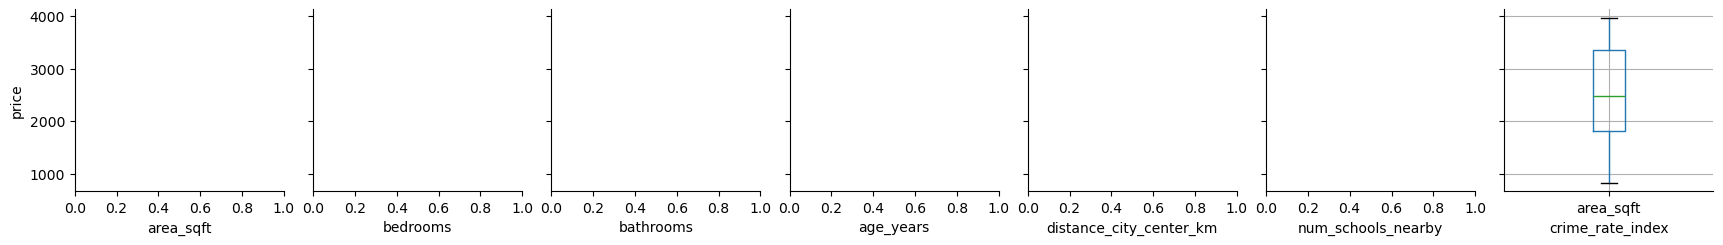

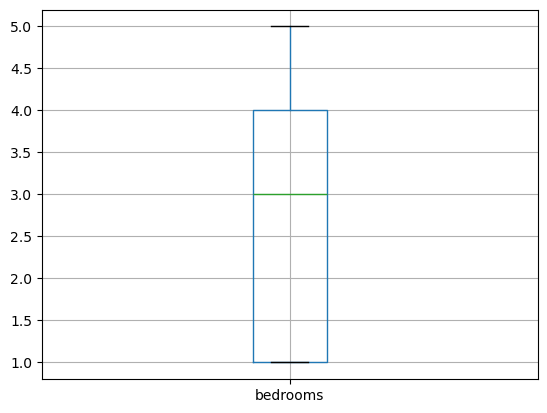

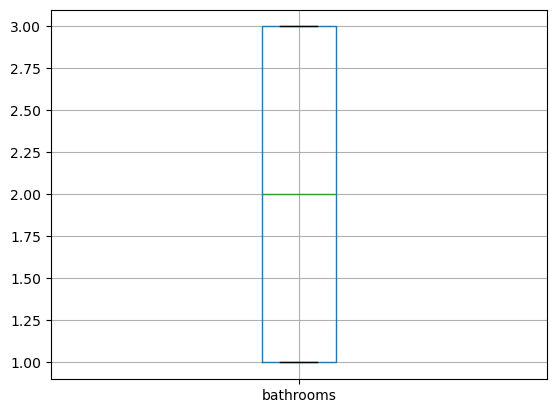

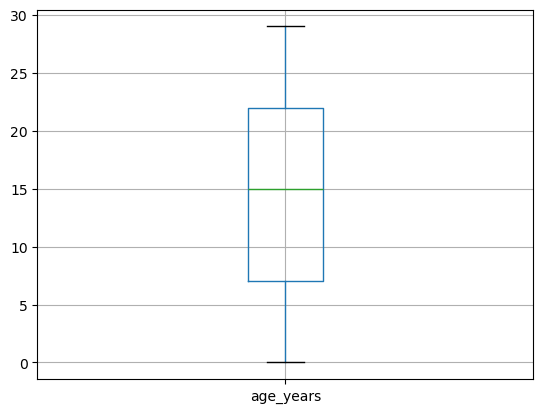

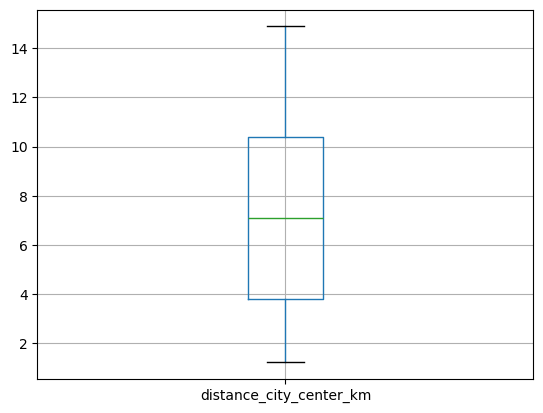

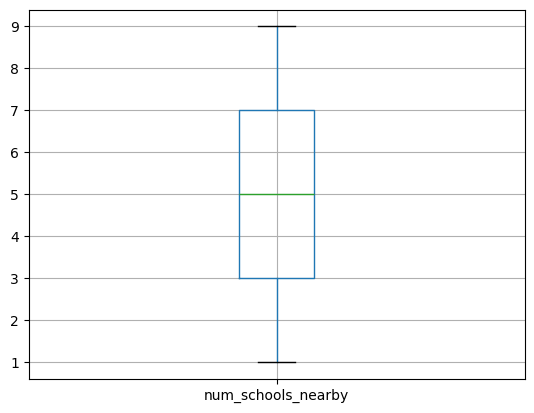

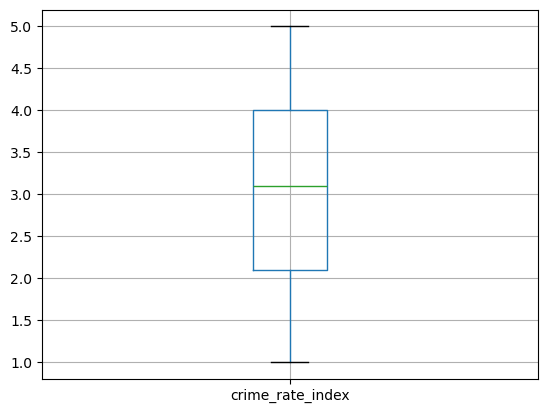

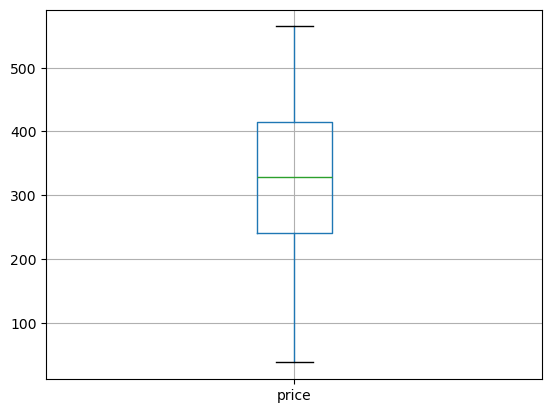

In [35]:
# Assumption 1 : There should be no outliers in the data 
# Check using boxplot

for i in house.columns:
    house.boxplot(column = i)
    plt.show()

### Our first assumption is satisfied as we have no outliers in our dataset.

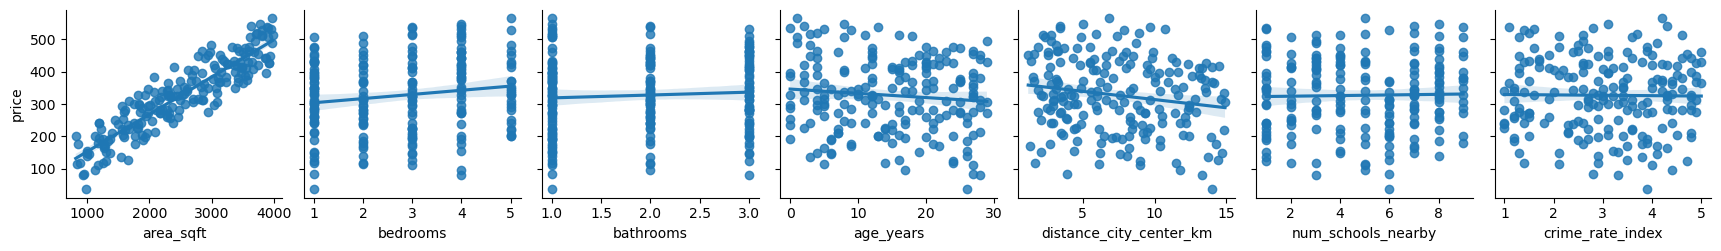

In [36]:
# Assumption 2 : Assumption of linearity : Every independent variable should have a 
# linear relationship with the dependent variable.

sns.pairplot(house,x_vars=['area_sqft','bedrooms','bathrooms','age_years',
                           'distance_city_center_km','num_schools_nearby','crime_rate_index'],
             y_vars=["price"],kind = 'reg')
plt.show()

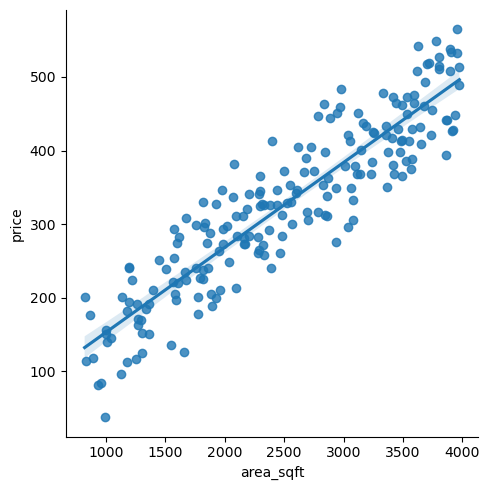

In [37]:
sns.lmplot(data=house,x='area_sqft',y='price')
plt.show()

In [38]:
# creating X and Y 
X = house.loc[:,['area_sqft','bedrooms','bathrooms','age_years',
'distance_city_center_km','num_schools_nearby','crime_rate_index']]

Y = house.loc[:,'price']

In [39]:
X

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index
0,3974,3,1,11,2.8,3,4.6
1,1660,3,1,16,14.4,6,3.5
2,2094,1,3,28,9.5,1,2.3
3,1930,5,2,5,4.2,7,4.3
4,1895,1,1,6,10.4,1,2.5
...,...,...,...,...,...,...,...
195,2106,2,2,18,6.0,3,3.5
196,3480,3,3,16,13.3,3,1.9
197,3475,4,1,20,6.5,4,3.1
198,1772,5,2,13,12.4,2,3.4


In [40]:
Y

0      514.15
1      125.82
2      213.67
3      327.44
4      188.46
        ...  
195    283.23
196    412.81
197    397.51
198    200.87
199    300.52
Name: price, Length: 200, dtype: float64

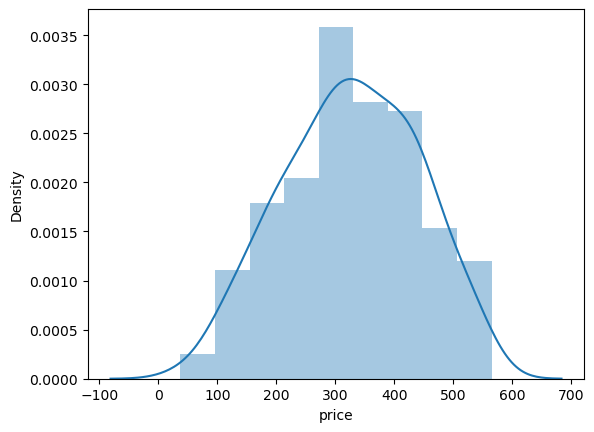

In [41]:
# Assumption 3 : Assumption of Normality. 
# The dependent variable should follow an approximate normal distribution.
sns.distplot(Y)
plt.show()

In [42]:
from scipy.stats import skew   # To check the skewness of the dependent variable.
skew(Y) 

np.float64(-0.13076559422897957)

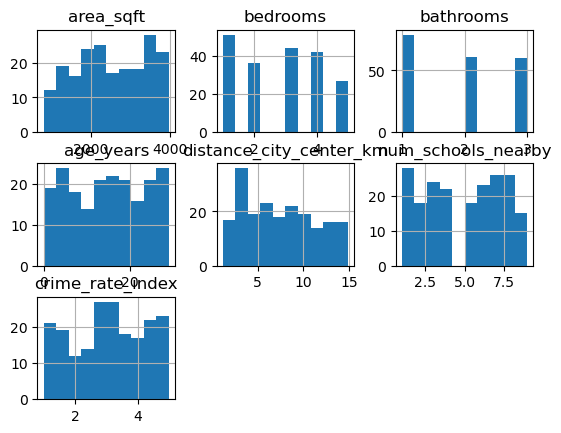

In [43]:
X.hist(bins = 10)
plt.show()

                         area_sqft  bedrooms  bathrooms  age_years  \
area_sqft                 1.000000 -0.029290  -0.003893   0.010917   
bedrooms                 -0.029290  1.000000   0.078755  -0.009998   
bathrooms                -0.003893  0.078755   1.000000   0.017569   
age_years                 0.010917 -0.009998   0.017569   1.000000   
distance_city_center_km   0.090295 -0.000653   0.063185  -0.034214   
num_schools_nearby       -0.032198 -0.096802  -0.091859   0.025566   
crime_rate_index          0.095437 -0.059255   0.036206  -0.004520   

                         distance_city_center_km  num_schools_nearby  \
area_sqft                               0.090295           -0.032198   
bedrooms                               -0.000653           -0.096802   
bathrooms                               0.063185           -0.091859   
age_years                              -0.034214            0.025566   
distance_city_center_km                 1.000000            0.079635   
num_sch

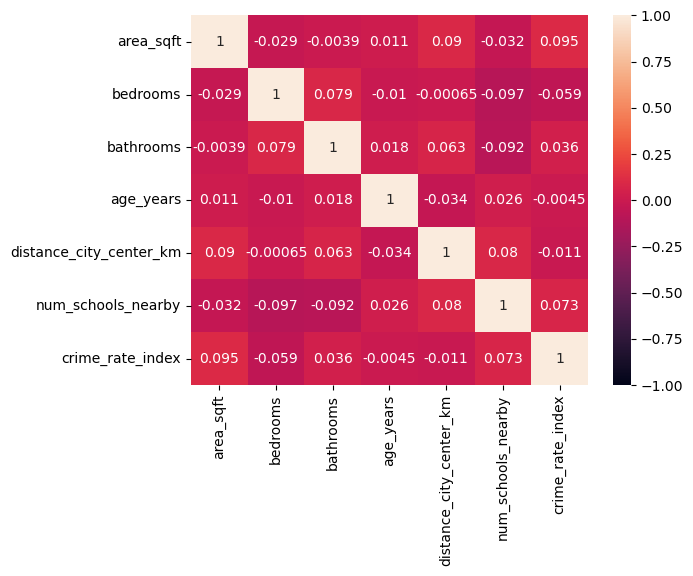

In [44]:
# Assumption 4 : Assumption of no multicollinearity
# There should be no multicollinearity between the independent variable.
# multicollinearity is the relationship amongst the multiple independent variables.  

corr_df = X.corr(method = 'pearson')
print(corr_df)

sns.heatmap(corr_df,vmax = 1.0,vmin = -1.0,annot = True)
plt.show() 

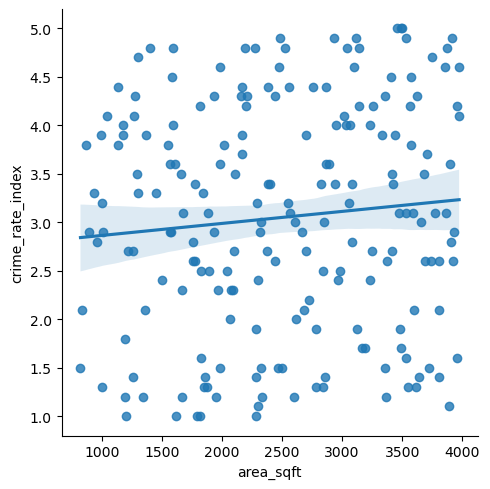

In [45]:
sns.lmplot(house,x = 'area_sqft',y = 'crime_rate_index')
plt.show()

In [46]:
# VIF : Variance inflation factor.
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["Features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values,i) for i in range(X.shape[1])]    
vif_df

,Features,VIF Factor
0,area_sqft,7.268928
1,bedrooms,4.379428
2,bathrooms,5.580013
3,age_years,3.520505
4,distance_city_center_km,4.443670
5,num_schools_nearby,4.160135
6,crime_rate_index,6.779365


In [47]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                 random_state = 10)

In [48]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of the train data:",X_train.shape[0]/X.shape[0]*100)

(160, 7)
(160,)
(40, 7)
(40,)
Percent of the train data: 80.0


In [49]:
from sklearn.linear_model import LinearRegression

# create a model object
lm = LinearRegression()

# train the model object
lm.fit(X_train,Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)   

55.11579054632193
[  0.11962825  15.3426662   12.93928766  -1.51897552  -8.16524448
   4.10929843 -10.84223645]


In [50]:
# pair the features names with coefficients
print(list(zip(X.columns,lm.coef_))) 

[('area_sqft', np.float64(0.11962824906696186)), ('bedrooms', np.float64(15.342666203008383)), ('bathrooms', np.float64(12.939287656878781)), ('age_years', np.float64(-1.5189755211059008)), ('distance_city_center_km', np.float64(-8.165244481874002)), ('num_schools_nearby', np.float64(4.109298426341349)), ('crime_rate_index', np.float64(-10.842236445369412))]


In [51]:
# predict using the model
Y_pred = lm.predict(X_test)
print(Y_pred)        

[459.66985605 518.72318234 398.2134199  220.04823381 388.28346952
 326.62003212 147.43723177 342.61702781 381.78588572 218.8488907
 237.21764492 128.21313514 353.35156266 296.84944939 424.07010312
 300.24918764 390.15516363 237.34026095 323.72396385 276.65243801
 255.04468059 527.54706759 280.38315569 276.3269246  455.79616828
 351.45848444 186.86420578 157.49080439 273.099052   250.19118446
 466.55549723 531.25434536 213.83262765 342.36078865 437.13668614
 397.82764615 155.37558989 214.79176753 348.21191835 536.10385184]


In [52]:
new_df = pd.DataFrame()
new_df = X_test.copy()

new_df['Actual price']=Y_test
new_df['Predicted price']=Y_pred
new_df=new_df.reset_index().drop('index', axis = 1)
new_df

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,Actual price,Predicted price
0,3412,1,2,12,3.7,8,2.7,473.38,459.669856
1,3892,3,2,13,9.7,9,1.1,537.85,518.723182
2,3653,1,1,15,9.7,3,3.0,409.28,398.213420
3,1772,5,2,13,12.4,2,3.4,200.87,220.048234
4,3235,4,1,27,10.0,5,2.4,384.28,388.283470
5,2315,5,2,7,11.6,7,2.9,327.54,326.620032
6,895,2,1,14,1.7,2,2.9,117.58,147.437232
7,2861,3,1,8,13.6,6,1.4,338.79,342.617028
8,3053,3,1,20,8.0,8,3.2,413.02,381.785886
9,2094,1,3,28,9.5,1,2.3,213.67,218.848891


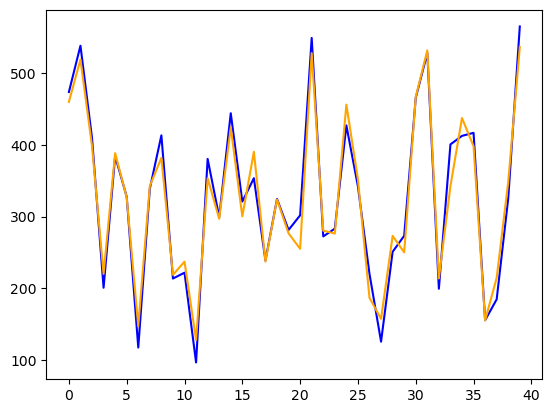

In [53]:
new_df['Actual price'].plot(color='blue')
new_df['Predicted price'].plot(color='orange')
plt.show()

In [54]:
print(lm.score(X_train,Y_train))

0.9706263064406955


In [55]:
print(len(Y_test))
print(len(Y_pred))      

40
40


In [56]:
import sklearn
sklearn.metrics.mean_squared_error(Y_test,Y_pred)  

517.2636681583332

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
mse = mean_squared_error(Y_test,Y_pred)
print("MSE:",mse)
 
mae = mean_absolute_error(Y_test,Y_pred)
print("MAE:",mae)                                   
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)           

R-squared: 0.9640708741936279
MSE: 517.2636681583332
MAE: 18.290250575909482
RMSE: 22.743431318917846
Adj R-square: 0.962760958148604


In [58]:
print(Y_test.min())
print(Y_test.max())

96.82
564.63


In [59]:
new_df

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,Actual price,Predicted price
0,3412,1,2,12,3.7,8,2.7,473.38,459.669856
1,3892,3,2,13,9.7,9,1.1,537.85,518.723182
2,3653,1,1,15,9.7,3,3.0,409.28,398.213420
3,1772,5,2,13,12.4,2,3.4,200.87,220.048234
4,3235,4,1,27,10.0,5,2.4,384.28,388.283470
5,2315,5,2,7,11.6,7,2.9,327.54,326.620032
6,895,2,1,14,1.7,2,2.9,117.58,147.437232
7,2861,3,1,8,13.6,6,1.4,338.79,342.617028
8,3053,3,1,20,8.0,8,3.2,413.02,381.785886
9,2094,1,3,28,9.5,1,2.3,213.67,218.848891


In [60]:
import os            # it will show current working directory.
os.getcwd()             

'C:\\Users\\Admin\\Documents\\PGA 41'

In [61]:
new_df['Residual'] = new_df['Actual price'] - new_df['Predicted price']
new_df.to_excel('House Price Prediction.xlsx',header = True,index = True)
new_df

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,Actual price,Predicted price,Residual
0,3412,1,2,12,3.7,8,2.7,473.38,459.669856,13.710144
1,3892,3,2,13,9.7,9,1.1,537.85,518.723182,19.126818
2,3653,1,1,15,9.7,3,3.0,409.28,398.213420,11.066580
3,1772,5,2,13,12.4,2,3.4,200.87,220.048234,-19.178234
4,3235,4,1,27,10.0,5,2.4,384.28,388.283470,-4.003470
5,2315,5,2,7,11.6,7,2.9,327.54,326.620032,0.919968
6,895,2,1,14,1.7,2,2.9,117.58,147.437232,-29.857232
7,2861,3,1,8,13.6,6,1.4,338.79,342.617028,-3.827028
8,3053,3,1,20,8.0,8,3.2,413.02,381.785886,31.234114
9,2094,1,3,28,9.5,1,2.3,213.67,218.848891,-5.178891


## Testing Phase --> Unseen Data
### Predicting the Y based on the X means
### Predicting the price based on future.

In [62]:
prediction = pd.DataFrame({'area_sqft': [3974,7654,2343,4321,7645],
                       'bedrooms': [3,2,3,2,3],
                       'bathrooms': [1,2,1,2,2],
                       'age_years': [11,12,11,10,13],	
                       'distance_city_center_km': [2.3,2.8,2.7,3.3,4.3],
                       'num_schools_nearby': [7,5,4,2,6],	
                       'crime_rate_index': [2.6,4.6,4.7,3.5,5.4]})	
prediction

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index
0,3974,3,1,11,2.3,7,2.6
1,7654,2,2,12,2.8,5,4.6
2,2343,3,1,11,2.7,4,4.7
3,4321,2,2,10,3.3,2,3.5
4,7645,3,2,13,4.3,6,5.4


In [63]:
Y_pred_pred = lm.predict(prediction)
Y_pred_pred

array([554.57221979, 956.89613031, 321.09585596, 556.72906978,
       952.83080929])

In [65]:
prediction['Price Pred'] = Y_pred_pred
prediction

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,Price Pred
0,3974,3,1,11,2.3,7,2.6,554.572220
1,7654,2,2,12,2.8,5,4.6,956.896130
2,2343,3,1,11,2.7,4,4.7,321.095856
3,4321,2,2,10,3.3,2,3.5,556.729070
4,7645,3,2,13,4.3,6,5.4,952.830809


In [66]:
from sklearn.model_selection import train_test_split
# Split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,
                                                 random_state = 10)

In [68]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error    
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
mse = mean_squared_error(Y_test,Y_pred)
print("MSE:",mse)
 
mae = mean_absolute_error(Y_test,Y_pred)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)                        

R-squared: 0.9640708741936279
MSE: 517.2636681583332
MAE: 18.290250575909482
RMSE: 22.743431318917846
Adj R-square: 0.962760958148604


In [71]:
new_df=pd.DataFrame
new_df=X_train.copy()

new_df['sales']=Y_train.copy()
new_df

,area_sqft,bedrooms,bathrooms,age_years,distance_city_center_km,num_schools_nearby,crime_rate_index,sales
190,2838,5,3,4,3.3,7,2.5,463.37
7,2969,4,3,7,2.6,1,2.4,459.65
26,1259,4,1,6,9.3,4,2.7,191.57
138,3531,3,2,12,6.6,1,3.1,449.36
58,3624,4,2,2,3.4,7,4.3,542.09
...,...,...,...,...,...,...,...,...
113,1962,1,1,7,9.2,6,2.3,209.78
64,3803,4,1,16,2.2,4,2.6,514.85
15,930,4,3,28,13.3,3,3.3,81.19
125,3899,1,1,8,2.4,9,3.6,507.47


In [72]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ area_sqft + bedrooms + age_years + distance_city_center_km + num_schools_nearby + crime_rate_index',
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())            

Intercept                  74.125709
area_sqft                   0.119632
bedrooms                   16.331742
age_years                  -1.484695
distance_city_center_km    -7.942479
num_schools_nearby          3.872444
crime_rate_index          -10.110313
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     639.3
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          1.31e-105
Time:                        11:07:25   Log-Likelihood:                -721.11
No. Observations:                 160   AIC:                             1456.
Df Residuals:                     153   BIC:                             1478.
Df Model:                           6                                         
Covariance Type

In [73]:
Y_pred_new = lm_model.predict(X_test)

In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)
 
mse = mean_squared_error(Y_test,Y_pred_new)
print("MSE:",mse)
 
mae = mean_absolute_error(Y_test,Y_pred_new)
print("MAE:",mae)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)                         

R-squared: 0.9618046301729393
MSE: 549.8902814915026
MAE: 19.594741278255725
RMSE: 23.449739475983577
Adj R-square: 0.9604120906479944


### Now, we will see some post building assumptions.

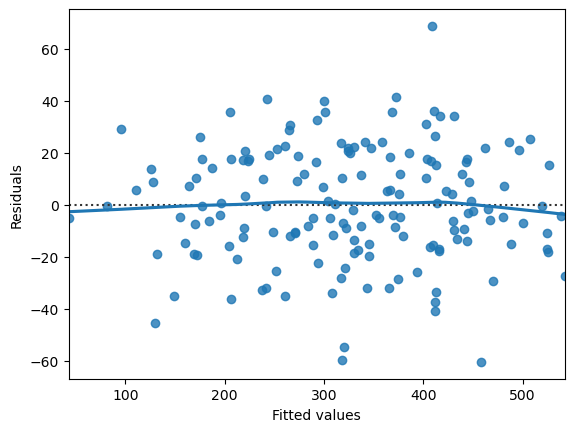

In [75]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show() 

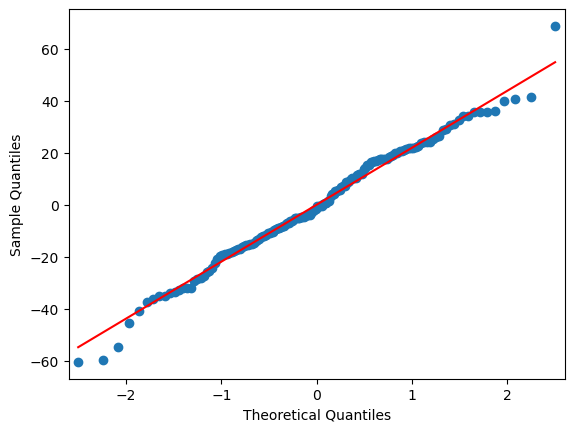

In [76]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()         

## We have successfully made the model and our models prediction is 96% accurate.